In [2]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

ar_df= pd.read_csv('Amazon_Reviews.csv')

In [3]:
ar_df

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1
...,...,...
194,A Book That Is Worth a Second Look: This book...,1
195,Best game ever: This games makes even amazing...,1
196,Guitar in Absentia: With all due respect to a...,0
197,Stiff and Smells like drying paint: You get w...,0


In [4]:
y=ar_df['Label']

In [5]:
y

0      1
1      1
2      1
3      1
4      1
      ..
194    1
195    1
196    0
197    0
198    0
Name: Label, Length: 199, dtype: int64

In [6]:
ar_df.drop(columns='Label',inplace=True)

In [7]:
ar_df

,Review
0,Stuning even for the non-gamer: This sound tr...
1,The best soundtrack ever to anything.: I'm re...
2,Amazing!: This soundtrack is my favorite musi...
3,Excellent Soundtrack: I truly like this sound...
4,"Remember, Pull Your Jaw Off The Floor After H..."
...,...
194,A Book That Is Worth a Second Look: This book...
195,Best game ever: This games makes even amazing...
196,Guitar in Absentia: With all due respect to a...
197,Stiff and Smells like drying paint: You get w...


In [8]:
X_train,X_test,y_train,y_test=train_test_split(ar_df,y,random_state=42,test_size=0.2)

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer

In [10]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stemmer=PorterStemmer()


def preprocessing(Review):
    
    final_tokens=' '
    tokens=tokenizer.tokenize(Review)
    #print('Tokens:',tokens)
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords.words('english')]
    #print('Pure Tokens:',pure_tokens)
    stemmed_tokens=[stemmer.stem(pure_token) for pure_token in pure_tokens]
    
    final_tokens=final_tokens.join(stemmed_tokens)
    
    return final_tokens


X_train['Cleaned_Review']=X_train['Review'].apply(preprocessing)


D:\New folder\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
X_train['Cleaned_Review']

183    hand track hear far complet though miss memor ...
38     work mac clearli say line work mac os system d...
24     like album thought would heard song two though...
142    pattern detail sketch although excit purchas b...
141    contemporari fairytal sure delight book take c...
                             ...                        
106    authent first encount yoruba say cd realli hel...
14     aw beyond belief feel write keep other wast mo...
92     omg soulwax own wow like amaz album ever everi...
179    yet anoth unsubstanti case believ discrimin ce...
102    ye got book expect much man wrong love book ma...
Name: Cleaned_Review, Length: 159, dtype: object

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(stop_words='english',use_idf=True)

vectorizer.fit(X_train['Cleaned_Review'])

X_test['Cleaned_Review']=X_test['Review'].apply(preprocessing)
X_train_TfIdf=vectorizer.transform(X_train['Cleaned_Review'])

X_test_tfIdf=vectorizer.transform(X_test['Cleaned_Review'])


D:\New folder\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [16]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt


clf = MultinomialNB().fit(X_train_TfIdf.toarray(),y_train)

#clf.score(X_train_TfIdf.toarray(),y_train)


#test_review= 'That product was its absolute best and I loved using every feature of it'
X_test['Cleaned_text']=X_test['Review'].apply(preprocessing)

#processed_test_review


y_pred=clf.predict(X_test_tfIdf.toarray())

confusion_matrix(y_test,y_pred)

y_proba_pred=clf.predict_proba(X_test_tfIdf.toarray())[::,1]

fpr,tpr,thresholds=roc_curve(y_test,y_proba_pred)

plt.plot(fpr,tpr)

roc_auc_score(y_test,y_proba_pred)

y_pred

D:\New folder\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

D:\New folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8426666666666667

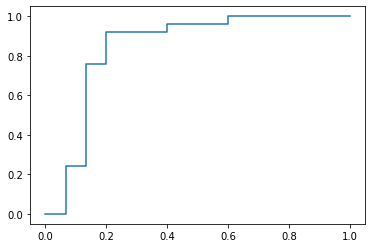

In [17]:
from sklearn.linear_model import  LogisticRegression

logit=LogisticRegression()
logit.fit(X_train_TfIdf,y_train)
y_logistic_pred=logit.predict(X_test_tfIdf)

y_logistic_proba_pred=logit.predict_proba(X_test_tfIdf.toarray())[::,1]

log_fpr,log_tpr,log_thresholds=roc_curve(y_test,y_logistic_proba_pred)

plt.plot(log_fpr,log_tpr)

roc_auc_score(y_test,y_logistic_proba_pred)
